<a href="https://colab.research.google.com/github/minyeoong/Python-Data-Analysis-and-Image-Processing/blob/main/OpenCV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OpenCV 소개 및 기본 사용법

컴퓨터 비전을 위한 OpenCV
- 영상 처리와 컴퓨터 비전을 위한 오픈소스 라이브러리
- C,C++,Python 등에서 사용 가능

In [1]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


In [2]:
import cv2
import matplotlib.pyplot as plt

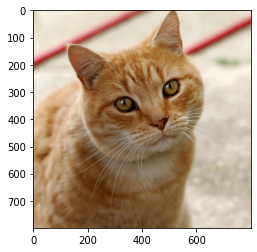

In [3]:
#이미지를 읽어서 살펴보기
img_basic = cv2.imread('cat.jpg',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_basic,cv2.COLOR_BGR2RGB)) #OpenCV:[B,G,R]/Matplotlib:[R,G,B]
plt.show()

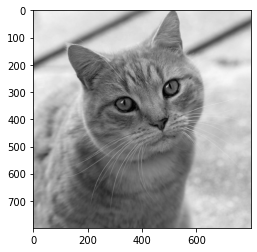

In [4]:
img_basic = cv2.cvtColor(img_basic,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_basic,cv2.COLOR_GRAY2RGB))
plt.show()

OpenCV 이미지 연산

In [5]:
image = cv2.imread('cat.jpg')

In [6]:
#픽셀 수 및 이미지 크기 확인
print(image.shape)
print(image.size)

(799, 800, 3)
1917600


In [7]:
#이미지 Numpy객체의 특정 픽셀을 가리킴
px = image[100,100]

In [8]:
print(px) #B,G,R 순서로 출력

[214 230 237]


In [9]:
print(px[2]) #R값만 출력

237


OpenCV를 활용한 특정 범위 픽셀 변경

--- 0.00830698013305664 seconds ---


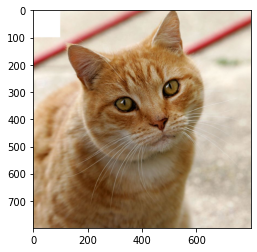

In [13]:
import time

image = cv2.imread('cat.jpg')

start_time=time.time()
for i in range(0,100):
  for j in range(0,100):
    image[i,j]=[255,255,255]
print("--- %s seconds ---" % (time.time() - start_time))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

--- 0.0013897418975830078 seconds --- 


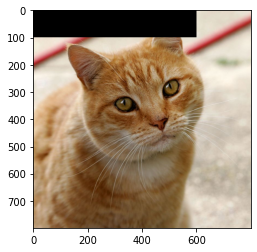

In [19]:
start_time = time.time()
image[0:100,0:100]=[0,0,0]
print("--- %s seconds --- " % (time.time() - start_time))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

ROI 추출 및 복사(Region Of Interest)

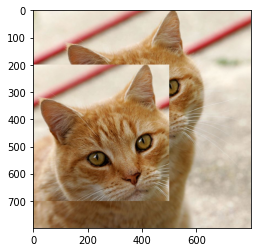

In [24]:
image = cv2.imread('cat.jpg')
roi = image[0:500,100:600]

image[200:700,0:500]=roi

plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

픽셀별로 색상 다루기

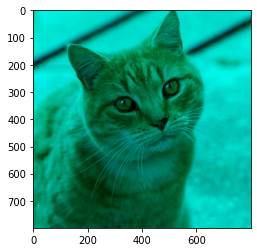

In [31]:
image = cv2.imread('cat.jpg')
image[:,:,2]=0 #R픽셀을 모두 2로 바꿈 
#image는 3차원 Numpy array이며 각 요소는 height, width, number of channels 
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

OpenCV 이미지 변형

In [ ]:
#이미지 크기 조절
#보간법(interpolation)

cv2.resize(image,dsize,fx,fy,interpolation

- dsize: Manual Size
- fx: 가로 비율
- fy: 세로 비율
- interpolation: 보간법
INTER_CUBIC: 사이즈를 작게할 때 주로 사용
INTER_AREA: 사이즈를 작게할 때 주로 사용

보간법은 사이즈가 변할 때 픽셀 사이의 값을
조절하는 방법을 의미함.

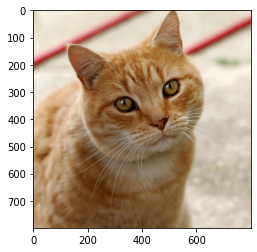

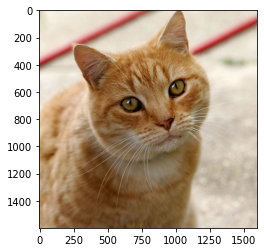

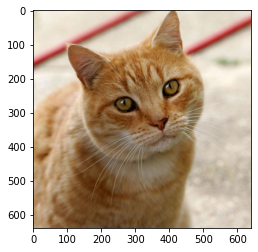

In [33]:
image = cv2.imread('cat.jpg')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

expand = cv2.resize(image,None,fx=2.0,fy =2.0, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand,cv2.COLOR_BGR2RGB))
plt.show()

shrink = cv2.resize(image,None,fx=0.8,fy=0.8,interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(shrink,cv2.COLOR_BGR2RGB))
plt.show()


이미지 위치 변경

cv2.warpAffine(image,M,dsize): 이미지의 위치를 변경
- M: 변환 행렬
- dsize: Manual Size

In [34]:
import numpy as np

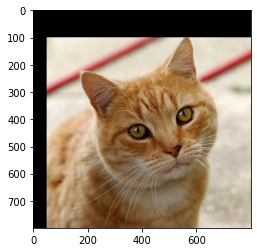

In [38]:
image = cv2.imread('cat.jpg')
height,width =image.shape[:2] #799,800

M = np.float32([[1,0,50],[0,1,100]]) #ppt참고 (x방향 50, y방향 10이동)
dst = cv2.warpAffine(image,M,(width,height))

plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB))
plt.show()

이미지 회전

- 회전행렬을 이용

회전행렬을 만들어주는 M값은 다소 어려우므로 함수를 호출한다. 

cv2.getRotationMatrix2D(center,angle,scale)
- center: 회전 중심
- angle: 회전 각도
- scale: Scale Factor


[[ 3.061617e-17  5.000000e-01  2.002500e+02]
 [-5.000000e-01  3.061617e-17  5.995000e+02]]


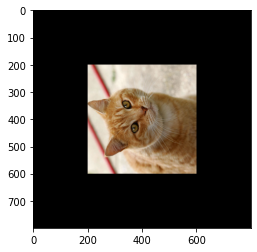

In [40]:
image = cv2.imread('cat.jpg')
height,width = image.shape[:2]
M = cv2.getRotationMatrix2D((width/2, height/2),90,0.5)
print(M)
dst = cv2.warpAffine(image,M,(width,height))
plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB))
plt.show()